# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions:  204244255, 205790124

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x620b4d8>, <__main__.Node at 0x620b1a8>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
#############################################################################
# TODO: Find the columns with missing values and remove them from the data.#
#############################################################################

data.describe()

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


We will split the dataset to `Training` and `Testing` datasets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [7]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    labels = data[:,-1]
    labels = pd.Series(labels)
    counts = labels.value_counts()
    
    for key in counts.keys():
        p_i = counts[key] / counts.sum()
        gini += np.power(p_i, 2)
        
    gini = 1 - gini

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [8]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    labels = data[:,-1]
    labels = pd.Series(labels)
    counts = labels.value_counts() 
    
    for key in counts.keys():
        p_i = counts[key] / counts.sum()
        entropy += p_i * np.log2(p_i)
    
    entropy = (-1) * entropy
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [9]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [10]:
def goodness_of_split_calc(data, feature, impurity_func):
    gain = 0.0
    impurity = impurity_func(data)   

    labels = data[:,feature]
    labels = pd.Series(labels)
    counts = labels.value_counts()

    for key in counts.keys():
        data_feature = data[data[:, feature] == key]
        impurity_v = impurity_func(data_feature)
        p_i = counts[key] / counts.sum()
        gain += p_i * impurity_v
        
    return impurity - gain 

    
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    goodness = 0.0
    split_info = 0.0

    if gain_ratio == False:
        goodness = goodness_of_split_calc(data, feature, impurity_func)
    
    else: 
        info_gain = goodness_of_split_calc(data, feature, calc_entropy)
        split_info = calc_entropy(data)
        

        goodness = info_gain / split_info 

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

In [13]:
# test
print(f'Goodness of split without gain ratio: {goodness_of_split(X, 0, calc_gini, gain_ratio=False)}')
print(f'Goodness of split with gain ratio: {goodness_of_split(X, 0, calc_gini, gain_ratio=True)}')

Goodness of split without gain ratio: 0.019959657834442257
Goodness of split with gain ratio: 0.03074665095901038


## Building a Decision Tree (ID3 Algorithm - Iterative Dichotomiser 3)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [14]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature, value, counts, is_leaf, ancestors):
        self.feature = feature # column index of criteria being tested
        self.value = value
        self.ancestors = ancestors
        self.children = []
        self.counts = counts
        self.is_leaf = is_leaf
        self.split_key = None

    def add_child(self, node):
        self.children.append(node)
        
    def get_num_children(self):
        return len(self.children)
    
    def add_split_key(self, name):
        self.split_key = name
    
    def update_counts(self, max_key):
        self.counts = pd.Series(np.array([1]), index = [max_key])

    def found_leaf(self):
        self.is_leaf = True
        
    def remove_leaf(self):
        self.is_leaf = False

    def remove_children(self):
        self.children = []
        
    def set_children(self, chidlren_list):
        self.children = chidlren_list
        
    def copy_node(self):
        dn = DecisionNode(self.feature, self.value, self.counts, self.is_leaf, self.ancestors)
        dn.set_children(self.children)
        return dn

In [15]:
def best_feature (data, impurity, gain_ratio, prev_features):
    best_feature = 0
    best_goodness = 0 
    data_1 = data.copy()
    data_1 = data_1[:, 0:-1]
    found_some_feature = False
    
    for feature in range(data_1.shape[1]): 
        if feature not in prev_features:
            goodness = goodness_of_split(data, feature, impurity, gain_ratio)
            if goodness > best_goodness:
                found_some_feature = True
                best_goodness = goodness
                best_feature = feature
    return best_goodness, best_feature, found_some_feature

def split (data, feature):
    data = data.copy()
    lables = pd.Series(data[:,feature]).sort_values().unique()
    DataFrameDict = {elem : pd.DataFrame for elem in lables}
    for key in DataFrameDict.keys():
        data_1 = data[data[:,feature] == key]
        DataFrameDict[key] = data_1
    return DataFrameDict

def build_tree(data, impurity, ancestors, gain_ratio=False, chi=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - chi: chi square p-value cut off (1 means no pruning)
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    """Builds the tree.
    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """
    ancestors = ancestors.copy()
    counts = pd.Series(data[:, -1]).value_counts()
    
    goodness, feature, found_some_feature = best_feature(data, impurity, gain_ratio, ancestors)

    if len(counts) == 1:
        node = DecisionNode(np.inf, goodness, counts, True, ancestors)
        return node
    
    if max_depth == 0:
        return node

    if found_some_feature == False:
        return None
    
    if found_some_feature == True:
        ancestors.append(feature)
        node = DecisionNode(feature, goodness, counts, False, ancestors)

    splited_data = split(data, feature)

    for name, rows in splited_data.items():
        child = build_tree(rows, impurity, ancestors , max_depth = max_depth - 1)
        if isinstance(child, DecisionNode):
            child.add_split_key(name)
            node.add_child(child)
            
    if node.get_num_children() == 0:
        node.found_leaf()
        return node

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node

In [14]:
# tree = build_tree(data=X_train, impurity=calc_gini,ancestors= [-1])

In [16]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini, ancestors = [-1]) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy, ancestors = [-1]) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, ancestors = [-1]) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [18]:
def classify(counter_dict):  
    if len(counter_dict) == 1:
        for key in counter_dict:
            label = key
            return label
        
    #Predicted is based on class with the maxium value in leaf node.

#     # An alternative way to make prediction is to use binomial distribution where the p-value 
#     # reflects the probability of success/ classifying a label as 'e' (wlog). In this case, 
#     # a leaf that contains data of both classes may not always predicat according to the maxium value
#     else:     
#         total = sum(counter_dict.values())
#         p = counter_dict['e']/total        
#         success = np.random.binomial(1,p)
#         if success == 0:
#             label = 'p'
#             return label
#         else:
#             label = "e"
#             return label 
    return max(counter_dict, key=lambda key: counter_dict[key])


def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    if len(instance) == 22:
        instance = instance[0:-1]
    
    if node.is_leaf:
        pred = classify(node.counts.to_dict())
        return pred
    
    for child in node.children:
        if child.split_key == instance[node.feature]:
            pred = predict(child, instance)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pred

In [20]:
#test prediction on single row vector in test data:
i = 3
prediction = predict(tree_gini, X_test[i])
print(f'For row vector: {X_test[i]} predicted class is: {prediction} based on gini and goodness of split decision tree')

For row vector: ['f' 'y' 'e' 'f' 'y' 'f' 'c' 'n' 'b' 't' 's' 's' 'w' 'w' 'p' 'w' 'o' 'e'
 'w' 'v' 'p' 'p'] predicted class is: p based on gini and goodness of split decision tree


In [21]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    prediction = []
    correct_matches = 0

    n = dataset.shape[0]

    for i in range(n):
        label = predict(node, dataset[i,:])
        prediction.append(label)
        if(dataset[i,-1] == prediction[i]):
            correct_matches += 1
    
    accuracy = correct_matches/n * 100

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

In [26]:
print(f'Accuracy of tree based on training data: {np.round(calc_accuracy(tree_gini, X_train), 2)}%')

Accuracy of tree based on training data: 98.23%


After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [28]:
#### Your code here ####
gini_train = calc_accuracy(tree_gini, X_train)
gini_test = calc_accuracy(tree_gini, X_test)

entr_train = calc_accuracy(tree_entropy, X_train)
entr_test = calc_accuracy(tree_entropy, X_test)

entr_gain_train = calc_accuracy(tree_entropy_gain_ratio, X_train)
entr_gain_test = calc_accuracy(tree_entropy_gain_ratio, X_test)

print(f'Accuracy of Gini tree on train data: {gini_train}%')
print(f'Accuracy of Gini tree on test data: {gini_test}%')
print(f'Accuracy of Entropy tree on train data: {entr_train}%')
print(f'Accuracy of Entropy tree on test data: {entr_test}%')
print(f'Accuracy of Entropy gain tree on train data: {entr_gain_train}%')
print(f'Accuracy of Entropy gain tree on test data: {entr_gain_test}%')

Accuracy of Gini tree on train data: 98.22747415066469%
Accuracy of Gini tree on test data: 76.51403249630724%
Accuracy of Entropy tree on train data: 98.58854423108485%
Accuracy of Entropy tree on test data: 76.12013786312161%
Accuracy of Entropy gain tree on train data: 98.58854423108485%
Accuracy of Entropy gain tree on test data: 76.12013786312161%


##### Tree with best test accuracy is Gini Tree

## Post pruning

Iterate over all nodes in the tree that have at least a single child which is a leaf. For each such node, replace it with its most popular class. Calculate the accuracy on the testing dataset, pick the node that results in the highest testing accuracy and permanently change it in the tree. Repeat this process until you are left with a single node in the tree (the root). Finally, create a plot of the training and testing accuracies as a function of the number of nodes in the tree. (15 points)

In [31]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    total = 1
    
    for child in (node.children):
        total = total + count_nodes(child)
    
    return total

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################  

In [68]:
def find_leaf_nodes(node, nodes_list):
    for child in node.children:
        if child.is_leaf:
            nodes_list.append(node)
        else:
            find_leaf_nodes(child, nodes_list)
            
    nodes_list = list(set(nodes_list))
    return nodes_list


def post_purning(node, X_test, X_train):
    copy_node = node.copy_node()
    count = count_nodes(node)
    print(count)
    accuracy_values_test = {}
    accuracy_values_train = {}

    while count > 1:
        nodes_list = []
        leaf_nodes = find_leaf_nodes(copy_node, nodes_list)
        #print("leaf_nodes: ", len(leaf_nodes))
        accuracy_check = {}

        if len(leaf_nodes) > 0:
            for n in leaf_nodes:
                n.found_leaf()
                accuracy = calc_accuracy(copy_node, X_test)
                accuracy_check[n] = accuracy
                n.remove_leaf()

            node_to_prun =  max(accuracy_check, key=lambda key: accuracy_check[key])
            #print(f'node_to_prune: has feature {node_to_prun.feature} and split key: {node_to_prun.split_key} with ancestors {node_to_prun.ancestors}')
            node_to_prun.found_leaf()
            node_to_prun.remove_children()
            cnt_dict = node_to_prun.counts
            max_value = cnt_dict.idxmax()  # maximum value
            
            node_to_prun.update_counts(max_value)
            count = count_nodes(node)
            #print(f'Number of existing nodes after pruning: {count}')

            accuracy = accuracy_check[node_to_prun]
            #print("test accuracy: ",accuracy)
            accuracy_values_test[count] = accuracy
            accuracy_values_train[count] = calc_accuracy(node, X_train)
            #print("train accuracy: ", accuracy_values_train[count])
        else:
            return accuracy_values_test, accuracy_values_train, node 

    return accuracy_values_test, accuracy_values_train, node

In [34]:
import copy
tree_1 = copy.deepcopy(tree_gini)
accuracy_values_test, accuracy_values_train, root = post_purning(tree_1, X_test, X_train)


Accuracy of test data: {2641: 78.48350566223536, 1783: 81.1915312653865, 1752: 81.53618906942393, 1726: 81.88084687346134, 1686: 82.27474150664698, 1059: 84.98276710979813, 866: 85.62284588872477, 803: 85.91826686361398, 752: 86.16445100935499, 683: 86.55834564254063, 597: 86.80452978828164, 488: 87.24766125061547, 473: 87.39537173806006, 456: 87.54308222550468, 454: 87.64155588380108, 441: 87.74002954209749, 422: 87.83850320039389, 397: 87.9369768586903, 360: 88.0354505169867, 346: 88.13392417528311, 302: 88.33087149187593, 257: 88.38010832102412, 250: 88.42934515017234, 242: 88.47858197932054, 233: 88.52781880846874, 174: 88.62629246676515, 168: 88.62629246676515, 160: 88.62629246676515, 156: 88.62629246676515, 152: 88.62629246676515, 148: 88.62629246676515, 138: 88.62629246676515, 137: 88.62629246676515, 133: 88.62629246676515, 106: 88.62629246676515, 100: 88.62629246676515, 92: 88.62629246676515, 76: 88.62629246676515, 72: 88.62629246676515, 61: 88.62629246676515, 55: 88.6262924667

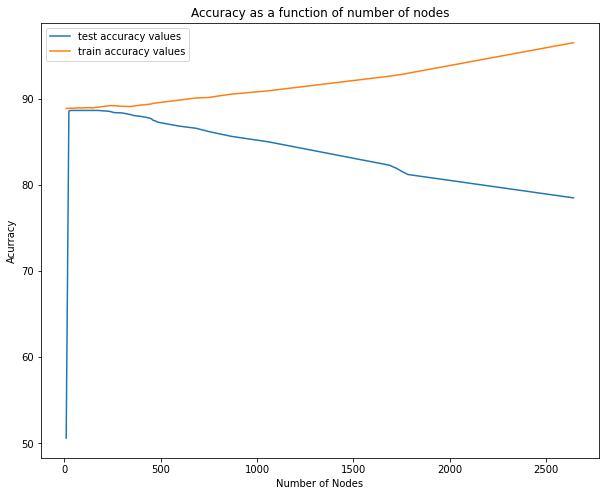

In [36]:
plt.plot(accuracy_values_test.keys(), accuracy_values_test.values(), label='test accuracy values')
plt.plot(accuracy_values_train.keys(), accuracy_values_train.values(), label='train accuracy values')
plt.xlabel("Number of Nodes")
plt.ylabel("Acurracy")
plt.title('Accuracy as a function of number of nodes')
plt.legend()
plt.show()

## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle. (15 points)

In [37]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [69]:
def calculate_chi(node, data, p_value):
    counter_dict = node.counts
    total = sum(counter_dict)
    for key in counter_dict:
        if key == 'e':
            p_e = counter_dict['e']/total  
            p_p = 1- p_e
        else:
            p_p = counter_dict['p']/total  
            p_e = 1-p_p
        break    

    feature_to_check = node.feature
    data_frame = pd.DataFrame(data)
    a = data[:, feature_to_check]
    unique, counts = np.unique(a, return_counts=True)
    D_feature = dict(zip(unique, counts))
    degree_of_freedom = pd.Series(data[:, feature_to_check]).nunique() - 1
    x_chi_squared = 0
    
    for index in D_feature:
        sub_Data = data_frame[data_frame.iloc[:,feature_to_check] == index]
        D_f = sub_Data.shape[0]
        p_f = sub_Data[sub_Data.iloc[:,-1] == 'e'].shape[0]
        n_f = sub_Data[sub_Data.iloc[:,-1] == 'p'].shape[0]
        E_0 = D_f*p_e
        E_1 = D_f*p_p
        
        value = ((p_f - E_0)**2)/E_0 + ((n_f - E_1)**2)/E_1
        x_chi_squared += value
    
    chi_test_value = chi_table[degree_of_freedom][p_value] 
    if x_chi_squared < chi_test_value:
        node.found_leaf()
        return node
    return node

    
def build_tree_with_pre_pruning(data, impurity, ancestors, p_value, gain_ratio=False, chi=1, max_depth=1000):
    ancestors = ancestors.copy()
    counts = pd.Series(data[:, -1]).value_counts()
    
    goodness, feature, found_some_feature = best_feature(data, impurity, gain_ratio, ancestors)

    if len(counts) == 1:
        node = DecisionNode(np.inf, goodness, counts, True, ancestors)
        return node
    
    if max_depth == 0:
        return node

    if found_some_feature == False:
        return None
    
    if found_some_feature == True:
        ancestors.append(feature)
        node = DecisionNode(feature, goodness, counts, False, ancestors)
        node = calculate_chi(node, data, p_value)    

        if node.is_leaf:
            return node
    
    splited_data = split(data, feature)
    for name, rows in splited_data.items():
        child = build_tree_with_pre_pruning(rows, impurity, ancestors, p_value = p_value , max_depth = max_depth - 1)
        
        if isinstance(child, DecisionNode):
            child.add_split_key(name)
            node.add_child(child)
            
    if node.get_num_children() == 0:
        node.found_leaf()
        return node
    return node    

In [70]:
def calculate_depth(node):
    if node is None:
        return 0
    
    if node.is_leaf:
        return 1
    
    depth = []
    for child in node.children:
        d = calculate_depth(child)
        depth.append(d)      
    return max(depth) + 1

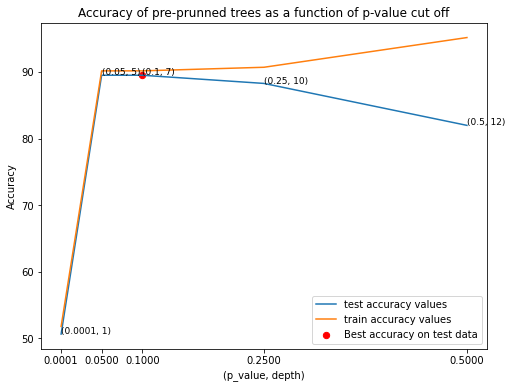

In [59]:
#Finding best p-value pre pruned tree and graphing results
p_values = [0.5, 0.25, 0.1, 0.05, 0.0001]
accuracy_values_test = {}
accuracy_values_train = {}
keys = []

for p_value in p_values:
    tree = build_tree_with_pre_pruning(data=X_train, impurity=calc_gini, ancestors= [-1], p_value=p_value)
    tree_depth = calculate_depth(tree)
    keys.append((p_value, tree_depth))
    accuracy_values_train[p_value] = calc_accuracy(tree, X_train)
    accuracy_values_test[p_value] = calc_accuracy(tree, X_test)

figure, axis = plt.subplots(1, figsize = (8,6))
plt.plot(list(accuracy_values_test.keys()), list(accuracy_values_test.values()), label='test accuracy values')
plt.plot(list(accuracy_values_train.keys()), list(accuracy_values_train.values()), label='train accuracy values')
axis.set_xticks(p_values)
plt.xlabel("(p_value, depth)")
plt.ylabel("Accuracy")
plt.title('Accuracy of pre-prunned trees as a function of p-value cut off')

x = list(accuracy_values_test.keys())
y = list(accuracy_values_test.values())    
x_0 = max(accuracy_values_test, key=lambda key: accuracy_values_test[key])
y_0 = accuracy_values_test[m]

plt.scatter(x_0, y_0, color = 'r', s=40, label = 'Best accuracy on test data')
for i, txt in enumerate(keys):
    axis.text(x[i], y[i]+.05, txt, fontsize=9)
    
plt.legend()
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to post pruning
1. tree_chi - the best tree according to chi square pruning

In [71]:
#### Your code here ####
tree = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, ancestors = [-1])
accuracy_values_test, accuracy_values_train, tree_max_depth = post_purning(tree, X_test, X_train)
tree_chi = build_tree_with_pre_pruning(data=X_train, impurity=calc_gini, ancestors= [-1], p_value=0.1)

3209


## Number of Nodes

Of the two trees above we will choose the one with fewer nodes. Complete the function counts_nodes and print the number of nodes in each tree. (5 points) 

In [ ]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    total = 1
    
    for child in (node.children):
        total = total + count_nodes(child)
    
    return total

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################  

In [72]:
print(f'Number of nodes in post prune tree: {count_nodes(tree_max_depth)}')
print(f'Number of nodes in pre prune tree: {count_nodes(tree_chi)}')

Number of nodes in post prune tree: 10
Number of nodes in pre prune tree: 92


## Print the tree

Complete the function `print_tree` and execute it on your chosen tree. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [75]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    spaces = ' '*(depth+1)

    if depth == 0:
        print(f'[{str(parent_feature)}, feature={str(node.feature)}],')

    current_feature = node.feature
    
    for child in node.children:
        if child.feature == np.inf:
            print(f'{spaces}[{current_feature}={child.split_key}, leaf]: [{child.counts.to_dict()}]') 
        
        else:
            print(f'{spaces}[{(current_feature)}={child.split_key}, feature={child.feature}],')
            print_tree(child, depth = depth + 1, parent_feature = current_feature)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

In [77]:
print_tree(tree_gini)

[ROOT, feature=4],
 [4=a, feature=2],
  [2=n, feature=8],
   [8=n, feature=19],
    [19=s, feature=0],
     [0=f, feature=18],
      [18=k, leaf]: [{'e': 1}]
      [18=n, feature=20],
       [20=g, leaf]: [{'e': 1}]
       [20=p, leaf]: [{'p': 1}]
    [19=y, leaf]: [{'e': 8}]
   [8=p, feature=0],
    [0=f, feature=19],
     [19=s, leaf]: [{'e': 2}]
     [19=y, leaf]: [{'p': 1}]
    [0=x, leaf]: [{'e': 7}]
   [8=w, feature=18],
    [18=k, feature=0],
     [0=f, leaf]: [{'e': 3}]
     [0=x, feature=20],
      [20=g, leaf]: [{'p': 1}]
      [20=p, leaf]: [{'e': 2}]
    [18=n, leaf]: [{'e': 7}]
  [2=w, feature=8],
   [8=g, feature=0],
    [0=b, feature=18],
     [18=k, leaf]: [{'e': 6}]
     [18=n, feature=1],
      [1=s, feature=19],
       [19=n, leaf]: [{'e': 1}]
       [19=s, leaf]: [{'p': 1}]
      [1=y, leaf]: [{'e': 2}]
    [0=x, leaf]: [{'e': 13}]
   [8=k, feature=0],
    [0=b, feature=1],
     [1=s, feature=18],
      [18=k, feature=20],
       [20=g, leaf]: [{'e': 2}]
       [20=

       [0=x, leaf]: [{'e': 1}]
     [19=y, leaf]: [{'e': 7}]
    [2=w, leaf]: [{'e': 11}]
    [2=y, leaf]: [{'e': 26}]
 [4=m, feature=0],
  [0=f, feature=2],
   [2=c, feature=5],
    [5=a, leaf]: [{'p': 2}]
    [5=f, leaf]: [{'e': 1}]
   [2=e, leaf]: [{'p': 4}]
   [2=n, leaf]: [{'p': 2}]
  [0=k, feature=2],
   [2=c, leaf]: [{'p': 4}]
   [2=e, feature=5],
    [5=a, feature=8],
     [8=w, leaf]: [{'e': 1}]
     [8=y, leaf]: [{'p': 1}]
    [5=f, leaf]: [{'p': 2}]
   [2=n, leaf]: [{'p': 3}]
  [0=x, leaf]: [{'p': 7}]
 [4=n, feature=18],
  [18=b, feature=0],
   [0=b, leaf]: [{'e': 10}]
   [0=f, leaf]: [{'e': 8}]
   [0=k, feature=8],
    [8=n, leaf]: [{'e': 3}]
    [8=o, leaf]: [{'p': 1}]
    [8=y, leaf]: [{'e': 3}]
   [0=x, feature=8],
    [8=n, feature=19],
     [19=c, leaf]: [{'p': 1}]
     [19=v, leaf]: [{'e': 2}]
    [8=o, leaf]: [{'e': 4}]
    [8=y, leaf]: [{'e': 4}]
  [18=h, feature=2],
   [2=r, feature=8],
    [8=h, feature=0],
     [0=f, leaf]: [{'p': 2}]
     [0=x, leaf]: [{'e': 1}]

         [11=k, feature=19],
          [19=n, leaf]: [{'p': 1}]
          [19=s, leaf]: [{'e': 1}]
         [11=s, leaf]: [{'e': 2}]
      [0=x, leaf]: [{'e': 13}]
     [10=s, feature=11],
      [11=k, feature=0],
       [0=b, feature=1],
        [1=f, leaf]: [{'e': 4}]
        [1=s, leaf]: [{'p': 1}]
       [0=k, leaf]: [{'e': 7}]
       [0=x, leaf]: [{'e': 8}]
      [11=s, feature=1],
       [1=f, feature=0],
        [0=b, leaf]: [{'e': 2}]
        [0=k, feature=2],
         [2=g, leaf]: [{'e': 2}]
         [2=w, leaf]: [{'p': 1}]
        [0=x, feature=2],
         [2=g, feature=19],
          [19=n, leaf]: [{'p': 1}]
          [19=s, leaf]: [{'e': 1}]
         [2=w, leaf]: [{'e': 1}]
       [1=s, leaf]: [{'e': 11}]
   [20=l, feature=2],
    [2=c, feature=0],
     [0=f, feature=1],
      [1=f, leaf]: [{'e': 3}]
      [1=y, feature=10],
       [10=f, feature=11],
        [11=f, leaf]: [{'e': 1}]
        [11=s, leaf]: [{'p': 1}]
       [10=s, leaf]: [{'e': 1}]
     [0=k, leaf]: [{'e': 